In [1]:
import pandas as pd
# if you want this data set, head here https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data
complaints = pd.read_csv('complaints.csv')

/Users/Chris/py_env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [3]:
complaints['Product'].value_counts().plot(kind='bar')

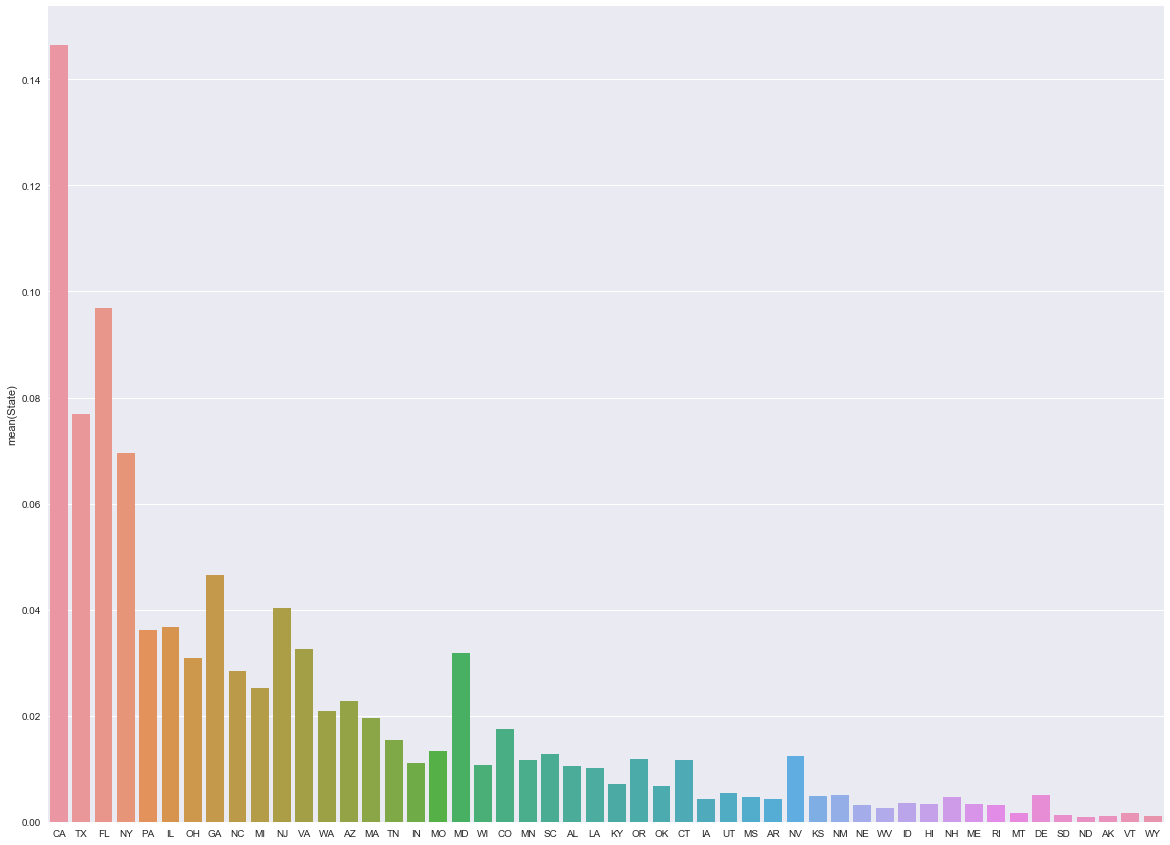

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# list of states ordered by population
states_pop = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI', 'NJ', 'VA', 'WA', 
              'AZ', 'MA', 'TN', 'IN', 'MO', 'MD', 'WI', 'CO', 'MN', 'SC', 'AL', 'LA', 'KY',
              'OR', 'OK', 'CT', 'IA', 'UT', 'MS', 'AR', 'NV', 'KS', 'NM', 'NE', 'WV', 'ID',
              'HI', 'NH', 'ME', 'RI', 'MT', 'DE', 'SD', 'ND', 'AK', 'VT', 'WY']
plt.figure(figsize=(20, 15))
sns.barplot(x=complaints['State'].value_counts().index, y=complaints['State'].value_counts(normalize=True), order=states_pop)

There's a correlation between population and number of complaints, but some states are outliers. Why do states like GA, NJ, MD, NV, and DE punch above their weight, so to speak?

In [5]:
disputed = complaints['Consumer disputed?'].dropna().value_counts(normalize=True)
print disputed

No     0.791632
Yes    0.208368
Name: Consumer disputed?, dtype: float64


In [6]:
products = complaints['Product'].unique()
for product in products:
    complaint_for_product = complaints[complaints['Product'] == product]['Consumer disputed?'].dropna()
    print product
    print '  percentage not disputing: {:.2f}%'.format(float(complaint_for_product.value_counts()[0])/complaint_for_product.shape[0] * 100)
    print '  percentage disputing: {:.2f}%'.format(float(complaint_for_product.value_counts()[1])/complaint_for_product.shape[0] * 100)
    

Consumer Loan
  percentage not disputing: 76.53%
  percentage disputing: 23.47%
Bank account or service
  percentage not disputing: 80.09%
  percentage disputing: 19.91%
Mortgage
  percentage not disputing: 76.24%
  percentage disputing: 23.76%
Debt collection
  percentage not disputing: 80.66%
  percentage disputing: 19.34%
Credit card
  percentage not disputing: 78.42%
  percentage disputing: 21.58%
Credit reporting
  percentage not disputing: 82.79%
  percentage disputing: 17.21%
Student loan
  percentage not disputing: 79.01%
  percentage disputing: 20.99%
Money transfers
  percentage not disputing: 84.88%
  percentage disputing: 15.12%
Payday loan
  percentage not disputing: 83.50%
  percentage disputing: 16.50%
Other financial service
  percentage not disputing: 78.32%
  percentage disputing: 21.68%
Prepaid card
  percentage not disputing: 84.90%
  percentage disputing: 15.10%
Virtual currency
  percentage not disputing: 60.00%
  percentage disputing: 40.00%


Some products have higher dispute rates than others? What causes this?

In [7]:
c = complaints.drop(complaints[complaints['Product'] == 'Virtual currency'].index)
g = pd.crosstab(c['Product'], [c['Timely response?'], c['Consumer disputed?']], normalize='index') * 100
c['Tags'].fillna('None', inplace=True)
g

Timely response?               No                  Yes           
Consumer disputed?             No       Yes         No        Yes
Product                                                          
Bank account or service  1.138256  0.298989  78.956686  19.606069
Consumer Loan            1.980235  0.537331  74.550032  22.932401
Credit card              0.588147  0.158010  77.831005  21.422839
Credit reporting         0.079948  0.018711  82.705654  17.195686
Debt collection          3.981705  0.783273  76.679054  18.555968
Money transfers          1.205584  0.317259  83.671743  14.805415
Mortgage                 1.132029  0.359496  75.107323  23.401153
Other financial service  5.137845  0.877193  73.182957  20.802005
Payday loan              4.825038  0.760704  78.678548  15.735710
Prepaid card             0.809717  0.342572  84.085955  14.761756
Student loan             0.907391  0.209749  78.099494  20.783366

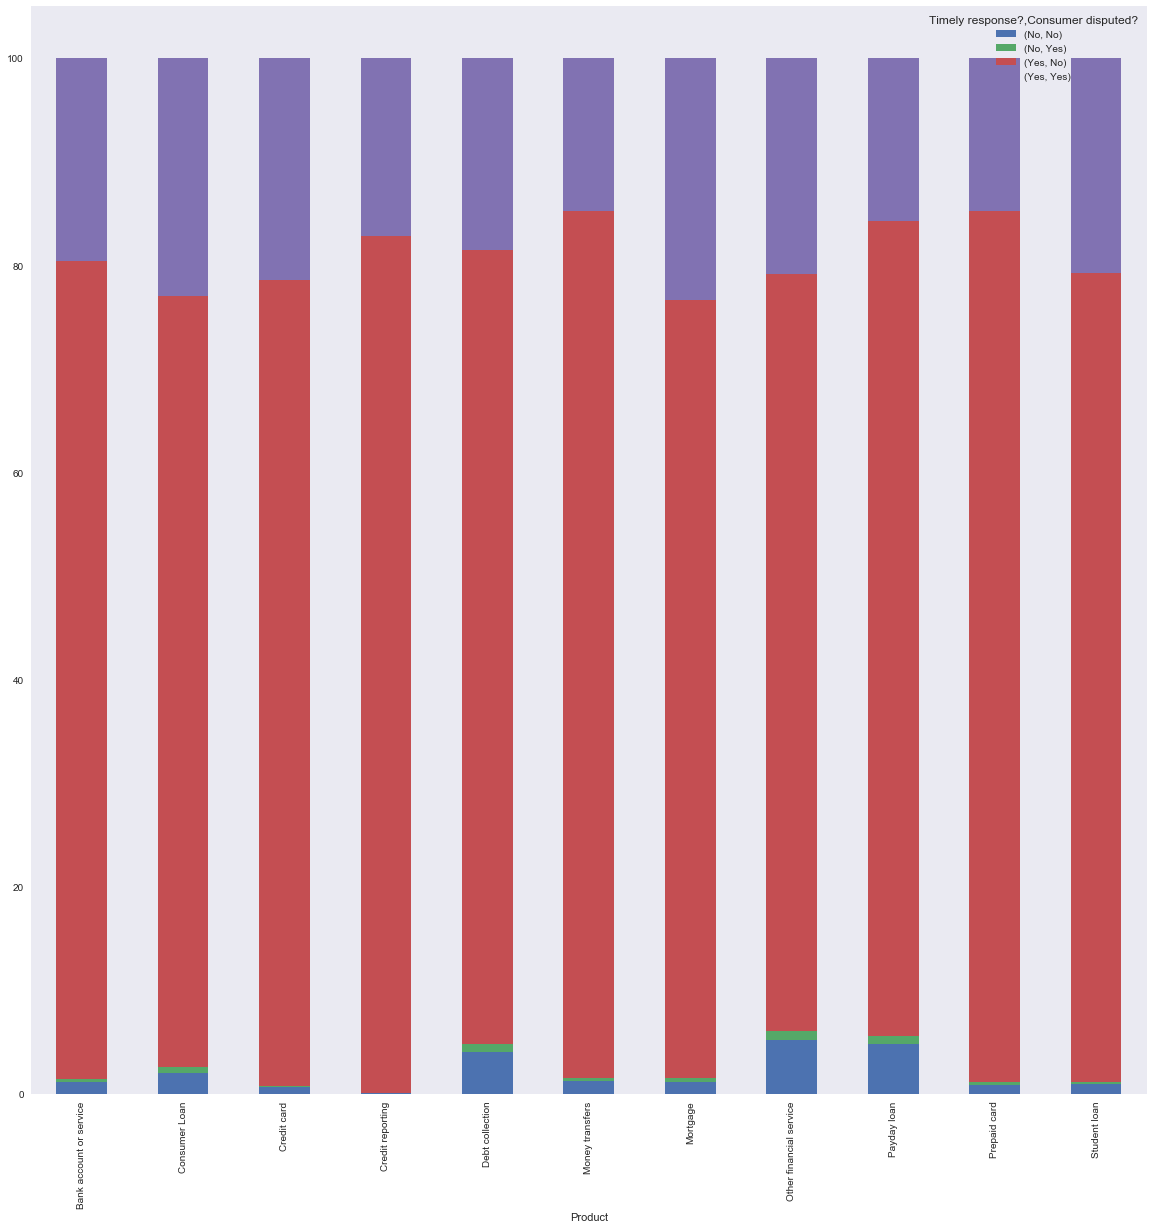

In [8]:
g.plot(kind='bar', stacked=True, grid=False, figsize=(20,20))

This chart helps us visualize timeliness vs untimeliness and disputed vs undisputed responses. What causes some industries to have higher numbers of untimely responses?

In [9]:
h = pd.crosstab(c['Product'], [c['Timely response?'], c['Consumer disputed?']], normalize='columns') * 100
h

Timely response?                No                   Yes           
Consumer disputed?              No        Yes         No        Yes
Product                                                            
Bank account or service   8.906218   9.726962  11.615995  10.941331
Consumer Loan             5.407347   6.100683   3.827626   4.466252
Credit card               4.812231   5.375427  11.973677  12.501555
Credit reporting          0.964498   0.938567  18.760382  14.795788
Debt collection          50.020521  40.912969  18.112155  16.626051
Money transfers           0.584855   0.639932   0.763210   0.512269
Mortgage                 24.297148  32.081911  30.310589  35.822960
Other financial service   0.420685   0.298635   0.112668   0.121481
Payday loan               2.277858   1.493174   0.698387   0.529832
Prepaid card              0.266776   0.469283   0.520897   0.346879
Student loan              2.041863   1.962457   3.304414   3.335602

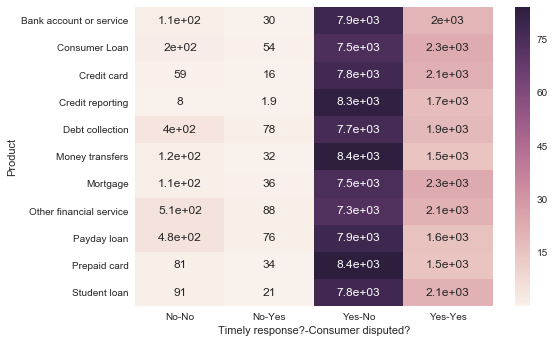

In [10]:
sns.heatmap(g, annot=g*100)

Nothing particularly interesting pops out here, that we didn't see above

In [11]:
v = pd.crosstab(c['Submitted via'], [c['Tags'], c['Timely response?'], c['Consumer disputed?']], normalize='columns') * 100
v

Tags                     None                                  Older American  \
Timely response?           No                   Yes                        No   
Consumer disputed?         No        Yes         No        Yes             No   
Submitted via                                                                   
Email                0.035980   0.050201   0.057634   0.057482       0.000000   
Fax                  1.235308   1.204819   1.433909   1.443058       1.437700   
Phone                6.608299   4.718876   5.721058   4.371214      21.405751   
Postal mail          4.161669   3.263052   7.302305   4.371214       3.674121   
Referral            15.543296  12.500000  21.392914  16.793356       3.993610   
Web                 72.415447  78.263052  64.092179  72.963675      69.488818   

Tags                                                 \
Timely response?                     Yes              
Consumer disputed?        Yes         No        Yes   
Submitted via                                         
Email                0.000000   0.007119   0.008513   
Fax                  3.508772   1.497461   1.821742   
Phone               10.526316  17.976648  13.152294   
Postal mail          6.432749   7.503916   5.839789   
Referral             5.263158   6.723148   5.763174   
Web                 74.269006  66.291708  73.414489   

Tags               Older American, Servicemember                        \
Timely response?                              No                   Yes   
Consumer disputed?                            No        Yes         No   
Submitted via                                                            
Email                                   0.000000   0.000000   0.000000   
Fax                                     2.500000   0.000000   2.665767   
Phone                                  35.000000  14.814815  35.228615   
Postal mail                             7.500000   7.407407   8.284124   
Referral                                4.166667   7.407407   4.892863   
Web                                    50.833333  70.370370  48.928632   

Tags                          Servicemember                                   
Timely response?                         No                   Yes             
Consumer disputed?        Yes            No        Yes         No        Yes  
Submitted via                                                                 
Email                0.063532      0.000000   0.000000   0.020527   0.029551  
Fax                  1.905972      0.151057   3.246753   1.334264   0.901300  
Phone               25.984752     13.293051   4.545455  13.461696   9.338061  
Postal mail         10.864041      2.567976   0.649351   2.795796   2.497045  
Referral             5.527319      3.172205   5.194805   5.817391   5.289598  
Web                 55.654384     80.815710  86.363636  76.570326  81.944444

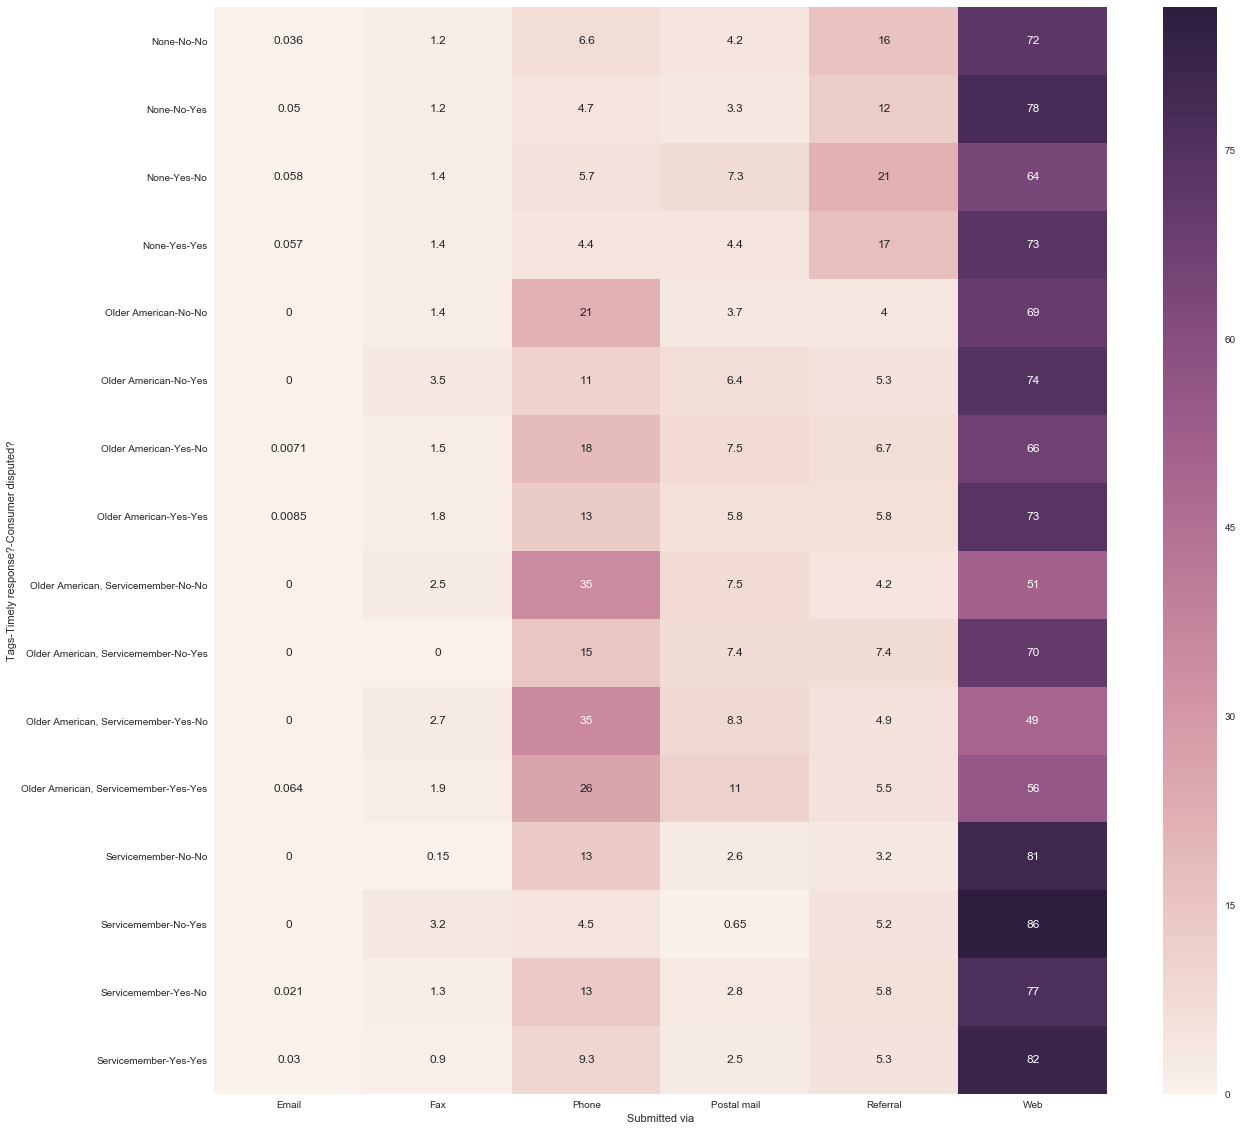

In [12]:
plt.figure(figsize=(20,20));

sns.heatmap(v.T, annot=True)

Different demographic groups tracked submit their complaints differently. And these get different responses, interestingly enough.

In [13]:
print complaints['Company response to consumer'].value_counts()

Closed with explanation            522320
Closed with non-monetary relief     88291
Closed with monetary relief         47581
Closed without relief               17863
Closed                              16228
Closed with relief                   5298
Untimely response                    4247
In progress                          3534
Name: Company response to consumer, dtype: int64


Given the sheer volume of closed with explanation complaints compared to the other categories, it is unlikely that we can extract something incredibly useful from this.

In [14]:
acs = pd.read_csv('acs.csv')
# American Community Survey Economic Data
acs.head()

/Users/Chris/py_env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,3,4,5,7,8,11,12,15,16,19,20,23,24,27,28,31,32,33,39,40,41,43,44,47,48,51,52,55,56,57,59,60,63,64,65,67,68,71,72,73,75,76,79,80,83,84,87,88,91,92,95,96,103,104,105,107,108,111,112,115,116,119,120,123,124,127,128,129,131,132,135,136,139,140,143,144,147,148,151,152,155,156,159,160,163,164,167,168,171,172,175,176,179,180,183,184,185,187,188,191,192,195,196,199,200,203,204,205,207,208,211,212,215,216,219,220,223,224,227,228,231,232,235,236,239,240,243,244,255,256,263,264,271,272,279,280,287,288,295,296,299,300,301,303,304,307,308,311,312,315,316,319,320,323,324,327,328,331,332,335,336,339,340,355,356,357,379,380,381,383,384,387,388,391,392,395,396,399,400,401,403,404,407,408,409,411,412,413,415,416,417,419,420,423,424,427,428,431,432,435,436,437,439,440,443,444,447,448,451,452,455,456,457,459,460,463,464,467,468,471,472) have mixed types. Specify dtype option on import or set low_

,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,...,HC03_VC178,HC04_VC178,HC01_VC179,HC02_VC179,HC03_VC179,HC04_VC179,HC01_VC180,HC02_VC180,HC03_VC180,HC04_VC180
0,Id,Id2,Geography,Estimate; EMPLOYMENT STATUS - Population 16 ye...,Margin of Error; EMPLOYMENT STATUS - Populatio...,Percent; EMPLOYMENT STATUS - Population 16 yea...,Percent Margin of Error; EMPLOYMENT STATUS - P...,Estimate; EMPLOYMENT STATUS - Population 16 ye...,Margin of Error; EMPLOYMENT STATUS - Populatio...,Percent; EMPLOYMENT STATUS - Population 16 yea...,...,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error; PERCENTAGE OF FAMILIE...,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error; PERCENTAGE OF FAMILIES AND PE...,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error; PERCENTAGE OF FAMILIE...,Estimate; PERCENTAGE OF FAMILIES AND PEOPLE WH...,Margin of Error; PERCENTAGE OF FAMILIES AND PE...,Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHO...,Percent Margin of Error; PERCENTAGE OF FAMILIE...
1,8600000US00601,00601,ZCTA5 00601,14262,215,14262,(X),6162,363,43.2,...,57.1,6.1,(X),(X),59.1,4.2,(X),(X),71.7,5.7
2,8600000US00602,00602,ZCTA5 00602,32723,195,32723,(X),15289,588,46.7,...,43.0,4.8,(X),(X),52.5,3.1,(X),(X),65.8,5.3
3,8600000US00603,00603,ZCTA5 00603,42534,642,42534,(X),17058,697,40.1,...,41.7,3.5,(X),(X),48.0,2.7,(X),(X),62.3,3.3
4,8600000US00606,00606,ZCTA5 00606,5041,229,5041,(X),1679,256,33.3,...,45.1,11.7,(X),(X),63.4,7.0,(X),(X),70.3,9.3


In [15]:
# get incomes and zipcodes out of that monstrosity
acs['ZIP code'] = acs['GEO.display-label'].apply(lambda x: x[6:])

In [16]:
complaints_m = complaints[~pd.isnull(complaints['ZIP code'])]

In [17]:
zip_incomes = pd.DataFrame(acs[['ZIP code', 'HC01_VC118']])
zip_incomes.drop(0, inplace=True)
zip_incomes.head()

,ZIP code,HC01_VC118
1,00601,7453
2,00602,8474
3,00603,10179
4,00606,5863
5,00610,8452


In [18]:
complaints_m = complaints_m[complaints_m['ZIP code'].str.isdigit()]

In [19]:
income_complaints = pd.merge(complaints_m, zip_incomes, how='left', on='ZIP code')
income_complaints = income_complaints[~pd.isnull(income_complaints['HC01_VC118'])]
income_complaints = income_complaints[income_complaints['HC01_VC118'].str.isdigit()]
income_complaints['income'] = income_complaints['HC01_VC118'].apply(lambda x: int(x))
print income_complaints['income'].describe()

count    540794.000000
mean      32064.791658
std       14563.465433
min         186.000000
25%       22618.000000
50%       28767.000000
75%       37830.000000
max      200387.000000
Name: income, dtype: float64


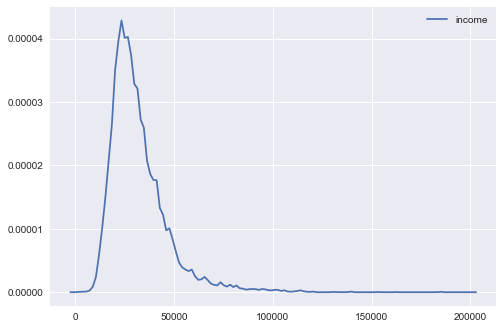

In [20]:
sns.kdeplot(income_complaints['income'])

In [21]:
income_complaints['quintile'] = pd.qcut(income_complaints['income'], q=5, labels=range(5))

In [22]:
pd.crosstab(income_complaints['quintile'], [income_complaints['Consumer disputed?']], normalize='columns') * 100

Consumer disputed?,No,Yes
quintile,,
0,20.351725,17.927480
1,20.191062,19.156676
2,20.170828,19.577165
3,19.809757,20.849387
4,19.476628,22.489292


Some suspicion confirmed: higher income groups dispute their claims more than lower income groups.

In [23]:
pd.crosstab(income_complaints['quintile'], [income_complaints['Timely response?']], normalize='columns') * 100

Timely response?,No,Yes
quintile,,
0,21.038411,19.975716
1,21.315905,19.969456
2,20.578355,20.029975
3,19.132467,19.981218
4,17.934862,20.043635


Higher income consumers also receive fewer untimely responses and lower income customers receive more.

In [24]:
pd.crosstab(income_complaints['quintile'], [income_complaints['Product']], normalize='columns') * 100

Product,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,Mortgage,Other financial service,Payday loan,Prepaid card,Student loan,Virtual currency
quintile,,,,,,,,,,,,
0,21.442347,23.259526,16.008748,22.785906,22.225419,24.076281,17.840777,27.805695,26.581172,27.531807,17.638545,0.0
1,18.930412,21.972194,17.893611,20.452002,21.710779,20.619785,19.658181,19.932998,23.433401,20.508906,20.514985,0.0
2,18.081507,19.860968,18.903696,20.625119,20.726250,18.951132,20.465793,16.917923,20.693675,17.251908,20.876802,50.0
3,19.357235,18.321318,21.737283,18.247936,18.874398,17.282479,21.211751,17.252931,17.167007,16.793893,21.286860,0.0
4,22.188498,16.585994,25.456662,17.889037,16.463155,19.070322,20.823497,18.090452,12.124745,17.913486,19.682808,50.0


The product distributions between income quintiles varies. Some food for thought: the ones lower income groups have more complaints about also have higher rates of untimely responses--these could be connected.

Overall it looks like there are some trends that we can exploit to predict whether a response will be disputed or not.